# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san antonio de pale
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | borujen
Processing Record 4 of Set 1 | las toscas
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | caluula
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | klyuchi
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | sarina
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | derzhavinsk
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | tual
Processing Record 22 of Set 1 | canton
Processing Re

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,301.72,73,100,2.54,GQ,1682425352
1,port-aux-francais,-49.3500,70.2167,277.51,73,41,7.61,TF,1682425352
2,borujen,31.9652,51.2873,290.18,28,94,7.88,IR,1682425352
3,las toscas,-28.3529,-59.2580,289.38,90,15,1.99,AR,1682425352
4,laguna,38.4210,-121.4238,286.47,86,0,3.09,US,1682425353


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/API Challenge/output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/API Challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,301.72,73,100,2.54,GQ,1682425352
1,port-aux-francais,-49.3500,70.2167,277.51,73,41,7.61,TF,1682425352
2,borujen,31.9652,51.2873,290.18,28,94,7.88,IR,1682425352
3,las toscas,-28.3529,-59.2580,289.38,90,15,1.99,AR,1682425352
4,laguna,38.4210,-121.4238,286.47,86,0,3.09,US,1682425353


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

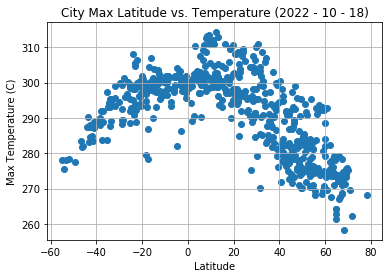

In [27]:
# Build scatter plot for latitude vs. temperature ## Ins_OpenWeatherDataFrame.ipynb
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022 - 10 - 18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/API Challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

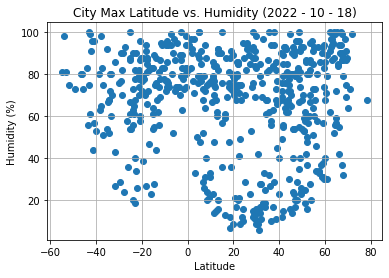

In [30]:
# Build the scatter plots for latitude vs. humidity ## Ins_OpenWeatherDataFrame.ipynb
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022 - 10 - 18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/API Challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

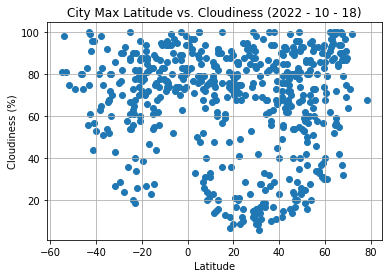

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022 - 10 - 18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/API Challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

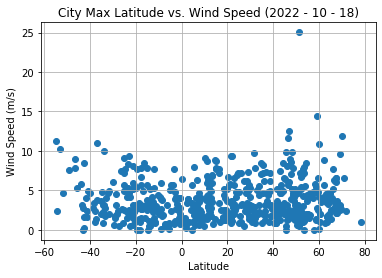

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022 - 10 - 18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/API Challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [91]:
# Define a function to create Linear Regression plots ## Matplotlib day 3 Activity 9 - vehicles.ipynb/ Python - API's / Day 3 / #9








In [92]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,borujen,31.9652,51.2873,290.18,28,94,7.88,IR,1682425352
4,laguna,38.4210,-121.4238,286.47,86,0,3.09,US,1682425353
5,stanley,54.8680,-1.6985,283.31,51,75,4.12,GB,1682425353
7,thompson,55.7435,-97.8558,268.24,68,20,1.54,CA,1682425354
8,college,64.8569,-147.8028,264.33,57,40,4.63,US,1682425354


In [93]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,301.72,73,100,2.54,GQ,1682425352
1,port-aux-francais,-49.3500,70.2167,277.51,73,41,7.61,TF,1682425352
3,las toscas,-28.3529,-59.2580,289.38,90,15,1.99,AR,1682425352
6,arraial do cabo,-22.9661,-42.0278,298.07,78,20,2.06,BR,1682425354
12,waitangi,-43.9535,-176.5597,287.49,83,93,5.81,NZ,1682425356


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6489451652623007


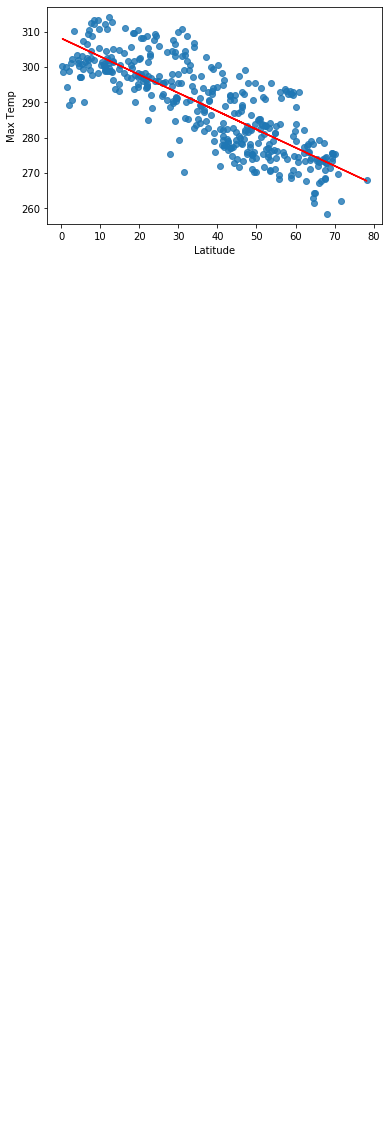

In [133]:
# Linear regression on Northern Hemisphere #Python - API's / Day 3 / #9
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north, y_values_north, linewidth=1, marker="o", alpha=0.8)
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.tight_layout
plt.show()

The r-value is: 0.45338678330657695


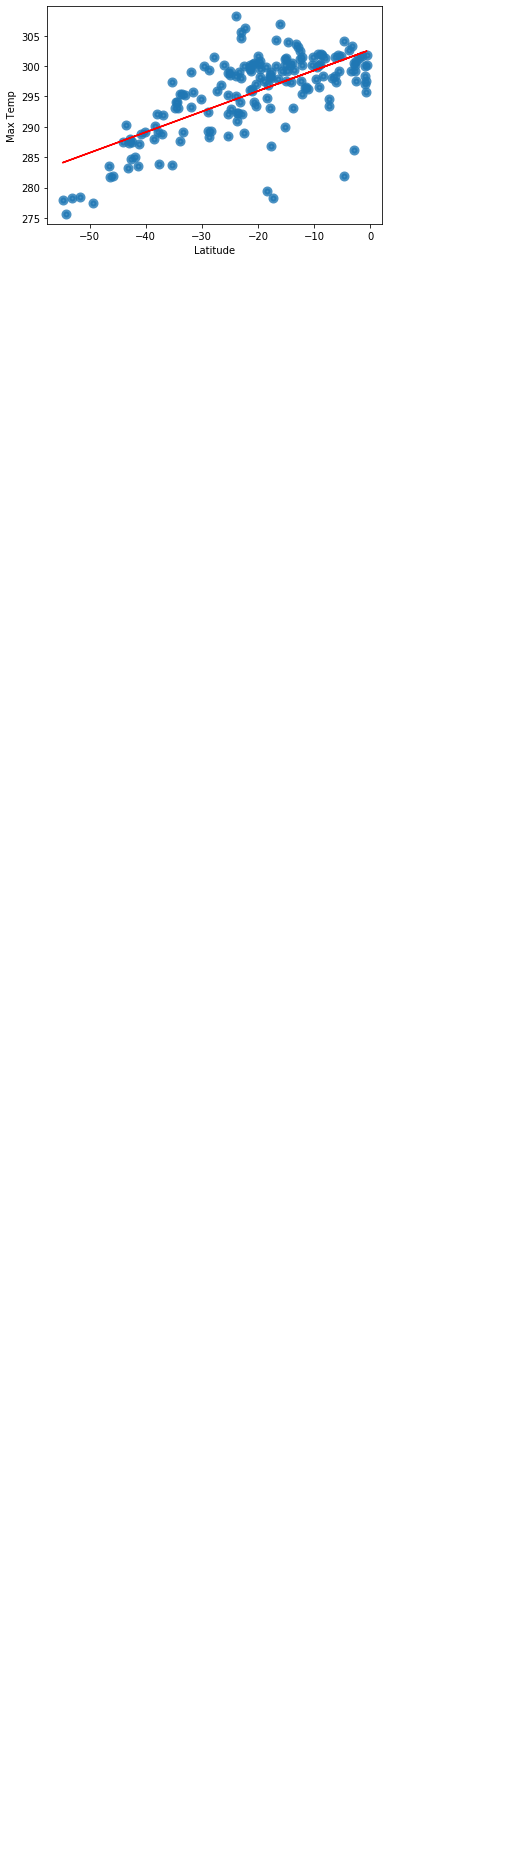

In [145]:
# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south, y_values_south, linewidth=4, marker="o", alpha=0.8)
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.tight_layout
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008450309453085537


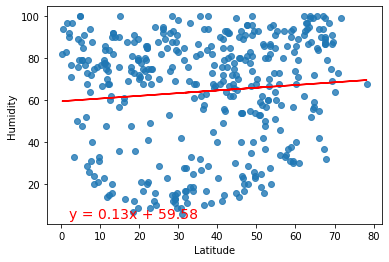

In [142]:
# Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north, y_values_north, linewidth=1, marker="o", alpha=0.8)
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.tight_layout
plt.show()

The r-value is: 0.017112546224276635


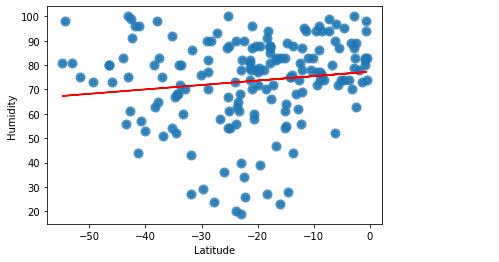

In [144]:
# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south, y_values_south, linewidth=4, marker="o", alpha=0.8)
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.tight_layout
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0007035754773795694


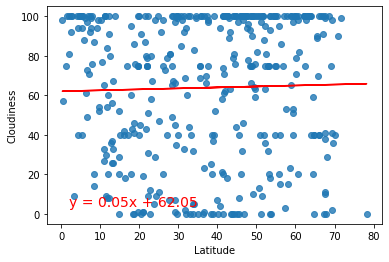

In [146]:
# Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north, y_values_north, linewidth=1, marker="o", alpha=0.8)
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.tight_layout
plt.show()

The r-value is: 0.004366774333852512


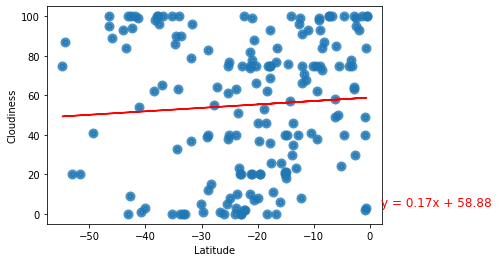

In [147]:
# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south, y_values_south, linewidth=4, marker="o", alpha=0.8)
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.tight_layout
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0108398855037874


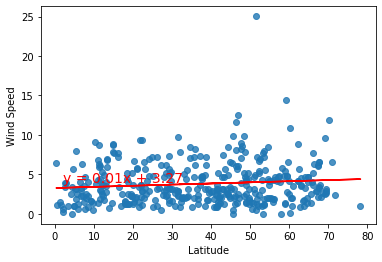

In [148]:
# Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north, y_values_north, linewidth=1, marker="o", alpha=0.8)
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.tight_layout
plt.show()

The r-value is: 0.07082548496183816


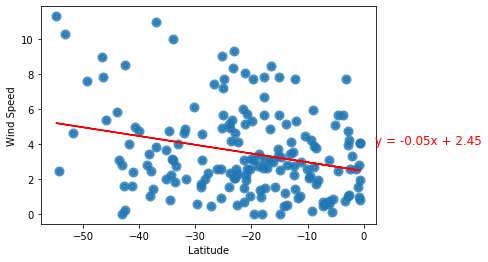

In [149]:
# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south, y_values_south, linewidth=4, marker="o", alpha=0.8)
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.tight_layout
plt.show()

**Discussion about the linear relationship:** 
The strongest correlation is found between lattitude and max temperature in the Northern Hemisphere with a r value of 0.6489451652623007

The linear regression on the Northern Hemisphere’s max temperatures yields a strong correlation with a downward slope. As the latitude increases the max temperature decreases, so there is a strong negative correlation.

The linear regression on the Southern Hemisphere’s max temperatures yields a moderate correlation with an upward slope. As the latitude increases the max temperature also increases supporting a moderate positive correlation.

The linear regression of Humidity in the Northern Hemisphere yields a very weak positive correlation

The linear regression of Humidity in the Southern Hemisphere also yields a very weak positive correlation

The linear regression of Cloudiness in the Northern Hemisphere yields a very weak positive correlation

The linear regression of Cloudiness in the Southern Hemisphere also yields a very weak positive correlation

The linear regression of Wind Speed in the Northern Hemisphere yields a very weak positive correlation

The linear regression of Wind Speed in the Southern Hemisphere yields a very weak negative correlation
